In [1]:
# TO BE RUN ONLY ONCE!
import os
os.chdir("../..")

In [2]:
import numpy as np
import pandas as pd
import pickle 
import matplotlib.pyplot as plt

import subprocess
import pymc3 as pm
import seaborn as sns

import spatial_mix.hdp_utils as hdp_utils
from spatial_mix.utils import *
from spatial_mix.protos.py.univariate_mixture_state_pb2 import UnivariateState, UnivariateMixtureState, HdpState

current_palette = sns.color_palette()

In [3]:
nX = [2, 4, 8, 16]
num_areas = [n**2 for n in nX]

In [4]:
# load data
data_path = "data/simulation2/simulation2_server"

# import execution times
with open(os.path.join(data_path, 'times.pickle'), "rb") as fp:
    times = pickle.load(fp)

In [5]:
times

{'sp_times': array([[0.00495243, 0.0016911 , 0.00161624, 0.00161505, 0.00144339,
         0.00153589, 0.00153661, 0.00165105, 0.00166941, 0.0018909 ],
        [0.00387287, 0.00328135, 0.00277305, 0.00295877, 0.002424  ,
         0.00308061, 0.00252652, 0.00308084, 0.0036881 , 0.00266385],
        [0.00426745, 0.00557017, 0.00572395, 0.00564003, 0.00538659,
         0.00528669, 0.00549364, 0.00558162, 0.00581408, 0.00526834],
        [0.02518702, 0.02025795, 0.02099514, 0.01458454, 0.00746608,
         0.0220108 , 0.00627279, 0.0070219 , 0.00778413, 0.00591731],
        [0.00611496, 0.0087707 , 0.01919079, 0.01661134, 0.00567007,
         0.00692272, 0.01667809, 0.00713015, 0.00604534, 0.00558138]]),
 'hdp_times': array([[0.00193548, 0.00176096, 0.00169516, 0.00165606, 0.00148225,
         0.00153279, 0.00153947, 0.00160551, 0.00167274, 0.00218344],
        [0.00370049, 0.00234246, 0.00239444, 0.00236416, 0.00239587,
         0.0024066 , 0.0024488 , 0.00240827, 0.00258732, 0.00239372],


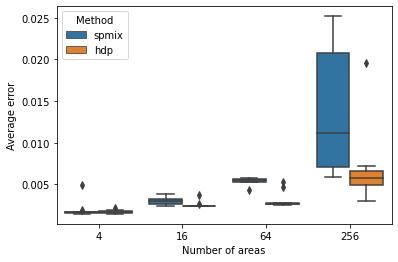

In [6]:
sp = pd.DataFrame(times['sp_times'].T[: ,:-1],
                  columns=num_areas)
sp = pd.melt(sp, value_vars=sp.columns, var_name='num_areas', value_name='error')
sp['Method'] = ['spmix']*sp.shape[0]

hdp = pd.DataFrame(times['hdp_times'].T[: ,:-1],
                   columns=num_areas)
hdp = pd.melt(hdp, value_vars=hdp.columns, var_name='num_areas', value_name='error')
hdp['Method'] = ['hdp']*hdp.shape[0]

# join dataframe
plt_data = pd.concat([sp, hdp], axis=0)

ax = sns.boxplot(x="num_areas", y="error",
            hue="Method", palette=['#1f77b4', '#ff7f0e'],
            data=plt_data)
ax.set_xlabel('Number of areas')
ax.set_ylabel('Average error')
plt.savefig('times.pdf')
plt.show()



## Errors

In [7]:
### KL divergence

In [8]:
# import errors
num_samples = 10
errors = {}
names = ['spmix', 'hdp']
errors['spmix'] = np.zeros((len(num_areas), num_samples))
errors['hdp'] = np.zeros((len(num_areas), num_samples))

for n in names:
    for i, a in enumerate(num_areas):
        for j in range(num_samples):
            file_name = os.path.join(data_path, n + '/dens/areas'+str(a)+'/'+str(j)+'.pickle')
            with open(file_name, "rb") as fp:
                e = pickle.load(fp)
                errors[n][i, j] = np.mean([t[2] for t in e['kl_divs']])

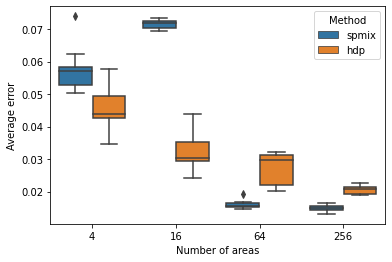

In [9]:
import seaborn as sns

sp = pd.DataFrame(errors['spmix'].T,
                  columns=num_areas)
sp = pd.melt(sp, value_vars=sp.columns, var_name='num_areas', value_name='error')
sp['Method'] = ['spmix']*sp.shape[0]

hdp = pd.DataFrame(errors['hdp'].T,
                   columns=num_areas)
hdp = pd.melt(hdp, value_vars=hdp.columns, var_name='num_areas', value_name='error')
hdp['Method'] = ['hdp']*hdp.shape[0]

# join dataframe
plt_data = pd.concat([sp, hdp], axis=0)

ax = sns.boxplot(x="num_areas", y="error",
            hue="Method", palette=['#1f77b4', '#ff7f0e'],
            data=plt_data)
ax.set_xlabel('Number of areas')
ax.set_ylabel('Average error')
plt.savefig('kl_errors_sim2.pdf')
plt.show()

### Hellinger distance

In [10]:
# import errors
num_samples = 10
errors = {}
names = ['spmix', 'hdp']
errors['spmix'] = np.zeros((len(num_areas), num_samples))
errors['hdp'] = np.zeros((len(num_areas), num_samples))

for n in names:
    for i, a in enumerate(num_areas):
        for j in range(num_samples):
            file_name = os.path.join(data_path, n + '/dens/areas'+str(a)+'/'+str(j)+'.pickle')
            with open(file_name, "rb") as fp:
                e = pickle.load(fp)
                errors[n][i, j] = np.mean([t[2] for t in e['hell_dist']])

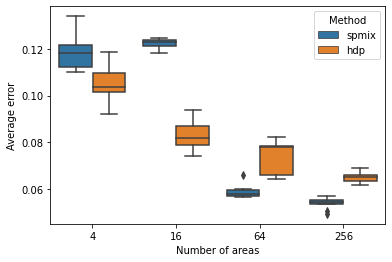

In [11]:
import seaborn as sns

sp = pd.DataFrame(errors['spmix'].T,
                  columns=num_areas)
sp = pd.melt(sp, value_vars=sp.columns, var_name='num_areas', value_name='error')
sp['Method'] = ['spmix']*sp.shape[0]

hdp = pd.DataFrame(errors['hdp'].T,
                   columns=num_areas)
hdp = pd.melt(hdp, value_vars=hdp.columns, var_name='num_areas', value_name='error')
hdp['Method'] = ['hdp']*hdp.shape[0]

# join dataframe
plt_data = pd.concat([sp, hdp], axis=0)

ax = sns.boxplot(x="num_areas", y="error",
            hue="Method", palette=['#1f77b4', '#ff7f0e'],
            data=plt_data)
ax.set_xlabel('Number of areas')
ax.set_ylabel('Average error')
plt.savefig('hellinger_errors_sim2.pdf')

plt.show()